In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram

In [5]:
circuit = QuantumCircuit(1)

circuit.h(0)
circuit.s(0)
circuit.h(0)
circuit.t(0)

display(circuit.draw())

┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ S ├┤ H ├┤ T ├
   └───┘└───┘└───┘└───┘

The default names for Qubits in Qiskit are $q_0, q_1$ and so on, and when there is a single qubit is it not subscripted with any number and just written as $q$. If we wish to choose our own names we can do so using the `QuantumRegister` class like this. 

In [9]:
X = QuantumRegister(1, 'X')
circuit = QuantumCircuit(X)

circuit.h(X)
circuit.s(X)
circuit.h(X)
circuit.t(X)

display(circuit.draw())

┌───┐┌───┐┌───┐┌───┐
X: ┤ H ├┤ S ├┤ H ├┤ T ├
   └───┘└───┘└───┘└───┘

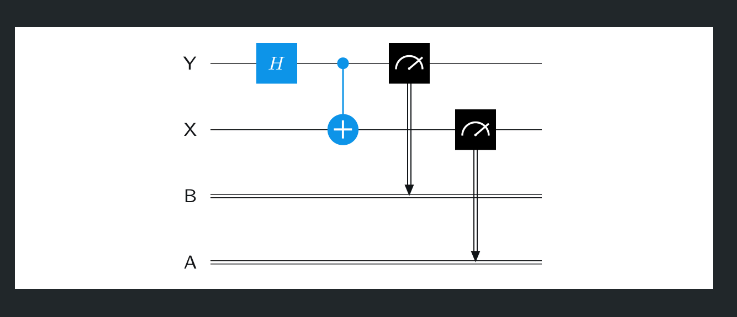

To implement this circuit in qiskit

In [2]:
Y = QuantumRegister(1, 'Y')
X = QuantumRegister(1, 'X')
A = ClassicalRegister(1, 'A')
B = ClassicalRegister(1, 'B')

circuit1 = QuantumCircuit(Y, X, B, A)

circuit1.h(Y)
circuit1.cx(Y, X)
circuit1.measure(Y, B)
circuit1.measure(X, A)

display(circuit1.draw())

┌───┐     ┌─┐   
  Y: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
  X: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
B: 1/═══════════╩══╬═
                0  ║ 
A: 1/══════════════╩═
                   0

This circuit can be stimulated using `Sampler` Primitive

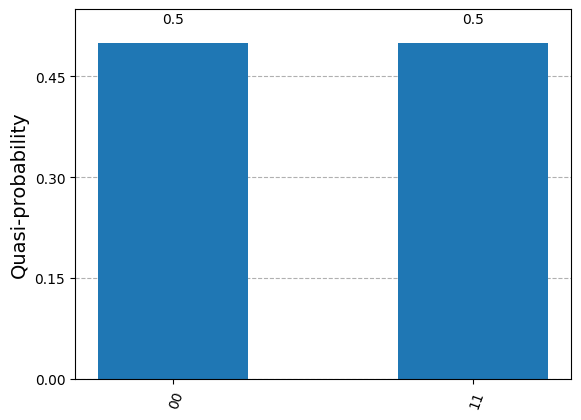

In [5]:
results = Sampler().run(circuit1).result()
statistics = results.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))